<a href="https://colab.research.google.com/github/ehgeraldo/engie3/blob/master/engie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de uma ação negociadas no mercado brasileiro com data sciente, escolhidas com base de analistas e site de referência logo abaixo:**

**Referências para a escolha das ações:**

**https://www.osmelhoresinvestimentos.com.br/bolsa-de-valores/acoes-da-engie-brasil/**

**Empresas de energia elétrica: ENGIE Brasil - ENGIE3**

**Vale ressaltar que a intenção é aplicação de dataScience**

In [0]:
from google.colab import files
from IPython.display import Image

In [29]:
upload = files.upload()

Saving engie.jpg to engie.jpg


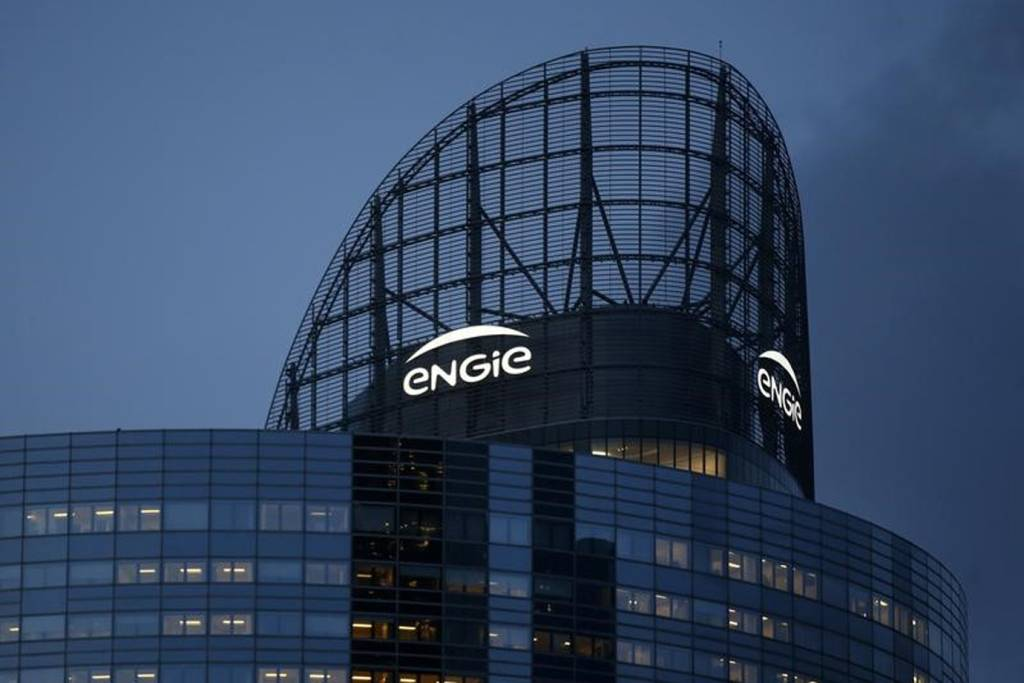

In [75]:
Image('engie.jpg', width = 1300)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import plotly
import plotly.offline as py

In [4]:
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)

In [0]:
# importar as bibliotecas necessárias:
# escolha da ação website: https://finance.yahoo.com/

# importação de dados para o DataFrame:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/engie3.csv')

In [6]:
# ver as 5 primeiras entradas

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-20,43.000000,43.200001,42.410000,42.509998,41.032196,1174700.0
1,2019-03-21,42.540001,42.700001,41.500000,41.750000,40.298618,1443100.0
2,2019-03-22,41.000000,41.459999,40.400002,40.900002,39.478168,1971400.0
3,2019-03-25,40.889999,41.860001,40.610001,41.439999,39.999393,1174000.0
4,2019-03-26,41.919998,42.720001,41.279999,42.090000,40.626797,961300.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null object
Open         250 non-null float64
High         250 non-null float64
Low          250 non-null float64
Close        250 non-null float64
Adj Close    250 non-null float64
Volume       250 non-null float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [40]:
df.shape

(251, 7)

In [42]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [43]:
df.count()

Date         251
Open         250
High         250
Low          250
Close        250
Adj Close    250
Volume       250
dtype: int64

In [44]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,45.896240,46.465720,45.282240,45.879240,44.838067,1.444278e+06
std,3.295794,3.294338,3.272257,3.321425,3.826995,6.987745e+05
min,40.470001,41.459999,40.130001,40.250000,38.936562,5.550000e+05
25%,43.580000,44.062499,42.990002,43.507500,42.087764,9.644500e+05
50%,44.885000,45.335001,44.270001,44.735000,43.454170,1.280950e+06
75%,47.497501,47.990002,47.017501,47.647501,46.942277,1.691025e+06
max,54.099998,54.330002,53.320000,54.099998,54.099998,4.845900e+06


In [7]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [0]:
pio.renderers.default = "colab"

**Plotando preços de fechamento da ação escolhida como exemplo.**

In [9]:
# import chart_studio.plotly as py

import plotly.graph_objs as go

data = [go.Scatter(x=df.Date, y=df['Close'])]

py.iplot(data)

In [38]:
import plotly.graph_objs as go

import pandas as pd

Close = go.Scatter(x=df.Date, y=df.Close,
                   name="ENGIE3 High",
                   line = dict(color = '#33BECF'),opacity = 0.8)

data = [Close]

layout = dict(title="Análise de 2018 à 2019", title_x=0.5, xaxis = dict(range=['2018-01-01', '2019-12-31']))

fig =dict(data=data, layout=layout)
py.iplot(fig, filename="Manually Set Range")

In [27]:

import plotly.graph_objs as go

Close = go.Scatter(
    x=df.Date,
    y=df.Close,
    name= "ENGIE3 High",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

data = [Close]

layout = dict(
    title="Série com Rangeslider e Botões",
    title_x=0.5,
    xaxis=dict(
        rangeselector=dict(
           buttons=list([
               dict(count=1,
                    label='1m',
                    step='month',
                    stepmode='backward'),
               dict(count=6,
                    label='6m',
                    stepmode='backward'),
               dict(step='all')
            ])
        ),
        rangeslider=dict(
             visible = True
             ), 
             type='date'
   )
)
fig = dict(data=data, layout=layout)
py.iplot(fig)

Análise com o gráfico Candlesticks observado na análise gráfica:

In [46]:
trace = go.Candlestick(x=df['Date'],
                       open=df['Open'],
                       high=df['High'],
                       low=df['Low'],
                       close=df['Close'])
data = [trace]
py.iplot(data, filename='simple_candlesticks')

**Utilização de médias como referências na representação gráfica:**

In [57]:
# DataFrame base:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MM_9,MM_17
0,2019-03-20,43.000000,43.200001,42.410000,42.509998,41.032196,1174700.0,NaN,NaN
1,2019-03-21,42.540001,42.700001,41.500000,41.750000,40.298618,1443100.0,NaN,NaN
2,2019-03-22,41.000000,41.459999,40.400002,40.900002,39.478168,1971400.0,NaN,NaN
3,2019-03-25,40.889999,41.860001,40.610001,41.439999,39.999393,1174000.0,NaN,NaN
4,2019-03-26,41.919998,42.720001,41.279999,42.090000,40.626797,961300.0,NaN,NaN


**O indicador Cruzamento de Médias Móveis está entre os mais simples que um investidor grafista pode utilizar e provavelmente é o primeiro que ele aprenderá em seus estudos. Justamente por isso, preparei para você um post completo sobre o assunto, para que aprenda o que é, como funcionam e como usar as médias móveis para day trade.**

**https://smarttbot.com/blog/medias-moveis-para-day-trade/**

In [0]:
#Média simples de 3 dias:
 df['MM_3'] = df.Close.rolling(window=3).mean()

In [0]:
#Média simples de 9 dias:
 df['MM_9'] = df.Close.rolling(window=9).mean()

In [0]:
  #Média simples de 17 dias:
  df['MM_17'] = df.Close.rolling(window=17).mean()

In [60]:
#Vizualização das colunas de médias criadas:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,MM_9,MM_17
0,2019-03-20,43.000000,43.200001,42.410000,42.509998,41.032196,1174700.0,NaN,NaN
1,2019-03-21,42.540001,42.700001,41.500000,41.750000,40.298618,1443100.0,NaN,NaN
2,2019-03-22,41.000000,41.459999,40.400002,40.900002,39.478168,1971400.0,NaN,NaN
3,2019-03-25,40.889999,41.860001,40.610001,41.439999,39.999393,1174000.0,NaN,NaN
4,2019-03-26,41.919998,42.720001,41.279999,42.090000,40.626797,961300.0,NaN,NaN
5,2019-03-27,41.520000,41.939999,40.849998,41.189999,39.758083,1404700.0,NaN,NaN
6,2019-03-28,40.930000,42.799999,40.520000,42.660000,41.176979,1603900.0,NaN,NaN
7,2019-03-29,42.619999,43.500000,42.430000,42.709999,41.225243,1476600.0,NaN,NaN
8,2019-04-01,43.320000,43.509998,42.400002,43.330002,41.823692,882200.0,42.064444,NaN
9,2019-04-02,43.419998,43.779999,42.369999,42.500000,41.022545,1319700.0,42.063333,NaN


In [66]:
close = go.Scatter(
              x=df.Date,
              y=df.Close,
              name = "ENGIE3 Close",
              line = dict(color = '#330000'),
              opacity = 0.8)

MM_9 = go.Scatter(
              x=df.Date,
              y=df['MM_9'],
              name = 'Média Móvel 9 Períodos',
              line = dict(color = '#B2FF66'),
              opacity = 0.8)


MM_17 = go.Scatter(
              x=df.Date,
              y=df['MM_17'],
              name = "Média Móvel 17 Períodos",
              line = dict(color = '#FF00FF'),
              opacity = 0.8)

data = [close, MM_9, MM_17]

py.iplot(data)